In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
pwd

'C:\\Users\\Admin\\Desktop\\datascience\\Unsuperwised machine learning'

In [3]:
dataset=pd.read_csv("Mall_Customers.csv")

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
dataset['Genre']=pd.get_dummies(dataset['Genre'],drop_first=True)

In [8]:
x=dataset.drop(columns='CustomerID')

In [9]:
x

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# Elbow Curve

In [10]:
from sklearn.cluster import KMeans

In [11]:
WCSS=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
    
print(WCSS)

[308862.06, 212889.442455243, 143391.59236035674, 104414.67534220166, 75412.59682443162, 58387.211042939205, 51169.25976088792, 45359.34437535677, 40629.17900056466, 37556.32987012988]


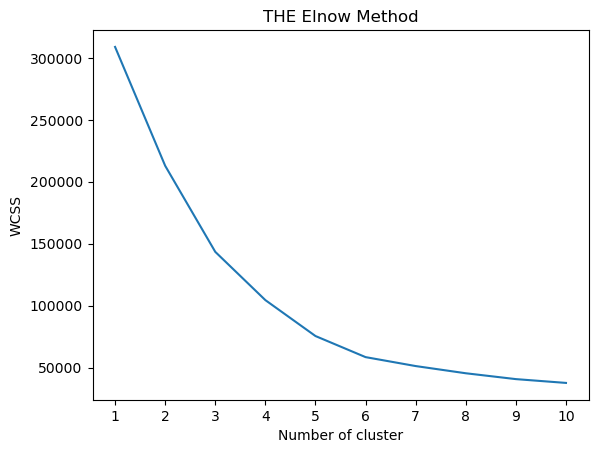

In [12]:
plt.plot(range(1,11),WCSS)
plt.xticks(range(1,11))
plt.title("THE Elnow Method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

# K-Means Model

In [13]:
#Modelling
kmeans=KMeans(n_clusters=5,init='k-means++')

In [14]:
#predict
y_kmeans=kmeans.fit_predict(x)

In [15]:
y_kmeans


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [16]:
kmeans.predict([[1,22,111,33]])

array([1])

Clustering - Observation

a.High income, High Spending Score(Cluster 5) - Target these customers by sending new product alerts which would lead to increase int the revenue collected by the mall as they are loyal customers.

b.High Income,Low Spending Score (Cluster 3)- Target these Customers by asking the feedback and advertising the product ina better way to convert them into Cluster 5 Clusters.

c.Average Income, Average Spending score(Cluster 2)-Can Target these set of customer by providing them with Low cost EMI's etc.

d.Low Income,High Spending Score(Cluster 1)-May or may not target these group of customers based on the policy of the mall.

e.Low income, High spending Score(Cluster 4)-Don't target these custommers since they have less income and need to save moneyt